# Citibike Example

https://www.citibikenyc.com/system-data

In [1]:
import requests
import json
import pandas as pd

In [2]:
# STATION STATUS 

# Let's get the data from the Citibike API
url = 'https://gbfs.citibikenyc.com/gbfs/en/station_status.json'
resp = requests.get(url)

# We transform the returned JSON answer from the API into a Python dictionary object
results = json.loads(resp.text)

# We only need a subset of the data in the JSON returned by the Citibike API, so we keep only we need
station_status = results["data"]['stations']
station_status

[{'num_bikes_disabled': 0,
  'station_status': 'active',
  'legacy_id': '72',
  'num_bikes_available': 5,
  'is_returning': 1,
  'num_docks_available': 50,
  'is_installed': 1,
  'num_docks_disabled': 0,
  'eightd_has_available_keys': False,
  'num_ebikes_available': 1,
  'station_id': '72',
  'last_reported': 1669823623,
  'is_renting': 1},
 {'num_bikes_disabled': 6,
  'station_status': 'active',
  'legacy_id': '79',
  'num_bikes_available': 26,
  'is_returning': 1,
  'num_docks_available': 1,
  'is_installed': 1,
  'num_docks_disabled': 0,
  'eightd_has_available_keys': False,
  'num_ebikes_available': 8,
  'station_id': '79',
  'last_reported': 1669830987,
  'is_renting': 1},
 {'num_bikes_disabled': 3,
  'station_status': 'active',
  'legacy_id': '82',
  'num_bikes_available': 21,
  'is_returning': 1,
  'num_docks_available': 3,
  'is_installed': 1,
  'num_docks_disabled': 0,
  'eightd_has_available_keys': False,
  'num_ebikes_available': 3,
  'station_id': '82',
  'last_reported': 

In [4]:
# STATION INFORMATION

# Let's get the station information from the Citibike API
url = 'https://gbfs.citibikenyc.com/gbfs/en/station_information.json'
resp = requests.get(url)

# We transform the returned JSON answer from the API into a Python dictionary object
results = json.loads(resp.text)

# We only need a subset of the data in the JSON returned by the Citibike API, so we keep only we need
station_information = results["data"]['stations']
station_information

[{'rental_methods': ['KEY', 'CREDITCARD'],
  'has_kiosk': True,
  'rental_uris': {'ios': 'https://bkn.lft.to/lastmile_qr_scan',
   'android': 'https://bkn.lft.to/lastmile_qr_scan'},
  'legacy_id': '72',
  'name': 'W 52 St & 11 Ave',
  'region_id': '71',
  'lon': -73.99392888,
  'short_name': '6926.01',
  'capacity': 19,
  'eightd_station_services': [],
  'lat': 40.76727216,
  'station_id': '72',
  'eightd_has_key_dispenser': False,
  'station_type': 'classic',
  'electric_bike_surcharge_waiver': False,
  'external_id': '66db237e-0aca-11e7-82f6-3863bb44ef7c'},
 {'rental_methods': ['KEY', 'CREDITCARD'],
  'has_kiosk': True,
  'rental_uris': {'ios': 'https://bkn.lft.to/lastmile_qr_scan',
   'android': 'https://bkn.lft.to/lastmile_qr_scan'},
  'legacy_id': '79',
  'name': 'Franklin St & W Broadway',
  'region_id': '71',
  'lon': -74.00666661,
  'short_name': '5430.08',
  'capacity': 33,
  'eightd_station_services': [],
  'lat': 40.71911552,
  'station_id': '79',
  'eightd_has_key_dispenser

### We can create a DataFrame from the list of dictionaries

In [5]:
station_status_df = pd.DataFrame(station_status)
print(station_status_df.shape)
station_status_df.head()

(1785, 15)


,is_returning,legacy_id,is_renting,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,num_ebikes_available,is_installed,station_status,station_id,eightd_has_available_keys,last_reported,eightd_active_station_services,valet
0,0,72,0,0,19,0,0,0,0,out_of_service,72,False,1656077825,NaN,NaN
1,1,79,1,29,1,3,0,5,1,active,79,False,1665705742,NaN,NaN
2,1,82,1,20,3,4,0,0,1,active,82,False,1665704959,NaN,NaN
3,1,83,1,14,40,5,2,0,1,active,83,False,1665706157,NaN,NaN
4,1,116,1,30,43,1,0,1,1,active,116,False,1665705974,NaN,NaN


In [6]:
station_information_df = pd.DataFrame(station_information)
print(station_information_df.shape)
station_information_df.head()

(1785, 16)


,rental_methods,has_kiosk,rental_uris,legacy_id,name,region_id,lon,short_name,capacity,eightd_station_services,lat,station_id,eightd_has_key_dispenser,station_type,electric_bike_surcharge_waiver,external_id
0,"[KEY, CREDITCARD]",True,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",72,W 52 St & 11 Ave,71,-73.993929,6926.01,19,[],40.767272,72,False,classic,False,66db237e-0aca-11e7-82f6-3863bb44ef7c
1,"[KEY, CREDITCARD]",True,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",79,Franklin St & W Broadway,71,-74.006667,5430.08,33,[],40.719116,79,False,classic,False,66db269c-0aca-11e7-82f6-3863bb44ef7c
2,"[KEY, CREDITCARD]",True,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",82,St James Pl & Pearl St,71,-74.000165,5167.06,27,[],40.711174,82,False,classic,False,66db277a-0aca-11e7-82f6-3863bb44ef7c
3,"[KEY, CREDITCARD]",True,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",83,Atlantic Ave & Fort Greene Pl,71,-73.976323,4354.07,62,[],40.683826,83,False,classic,False,66db281e-0aca-11e7-82f6-3863bb44ef7c
4,"[KEY, CREDITCARD]",True,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",116,W 17 St & 8 Ave,71,-74.001497,6148.02,74,[],40.741776,116,False,classic,False,66db28b5-0aca-11e7-82f6-3863bb44ef7c


### Merge two datasets together

In [7]:
df = pd.merge(station_status_df, station_information_df, left_on='station_id', right_on='station_id')
print(df.shape)
df.head()

(1785, 30)


,is_returning,legacy_id_x,is_renting,num_bikes_available,num_docks_available,num_bikes_disabled,num_docks_disabled,num_ebikes_available,is_installed,station_status,...,region_id,lon,short_name,capacity,eightd_station_services,lat,eightd_has_key_dispenser,station_type,electric_bike_surcharge_waiver,external_id
0,0,72,0,0,19,0,0,0,0,out_of_service,...,71,-73.993929,6926.01,19,[],40.767272,False,classic,False,66db237e-0aca-11e7-82f6-3863bb44ef7c
1,1,79,1,29,1,3,0,5,1,active,...,71,-74.006667,5430.08,33,[],40.719116,False,classic,False,66db269c-0aca-11e7-82f6-3863bb44ef7c
2,1,82,1,20,3,4,0,0,1,active,...,71,-74.000165,5167.06,27,[],40.711174,False,classic,False,66db277a-0aca-11e7-82f6-3863bb44ef7c
3,1,83,1,14,40,5,2,0,1,active,...,71,-73.976323,4354.07,62,[],40.683826,False,classic,False,66db281e-0aca-11e7-82f6-3863bb44ef7c
4,1,116,1,30,43,1,0,1,1,active,...,71,-74.001497,6148.02,74,[],40.741776,False,classic,False,66db28b5-0aca-11e7-82f6-3863bb44ef7c


In [8]:
df.dtypes

is_returning                        int64
legacy_id_x                        object
is_renting                          int64
num_bikes_available                 int64
num_docks_available                 int64
num_bikes_disabled                  int64
num_docks_disabled                  int64
num_ebikes_available                int64
is_installed                        int64
station_status                     object
station_id                         object
eightd_has_available_keys            bool
last_reported                       int64
eightd_active_station_services     object
valet                              object
rental_methods                     object
has_kiosk                            bool
rental_uris                        object
legacy_id_y                        object
name                               object
region_id                          object
lon                               float64
short_name                         object
capacity                          

### Exercise

- get the statistics for ALL the columns
- find the number of `active`/`out_of_service` stations

In [9]:
# your code goes here


In [10]:
%matplotlib inline
import matplotlib as plt

# This defines the size of the image below
plt.rcParams['figure.figsize'] = (12, 12)

<AxesSubplot:>

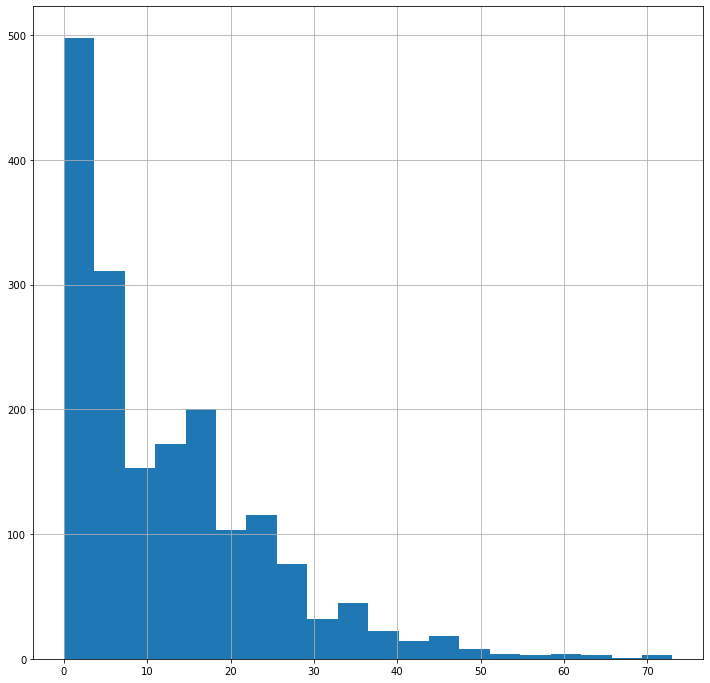

In [11]:
df["num_bikes_available"].hist(bins=20)

<AxesSubplot:>

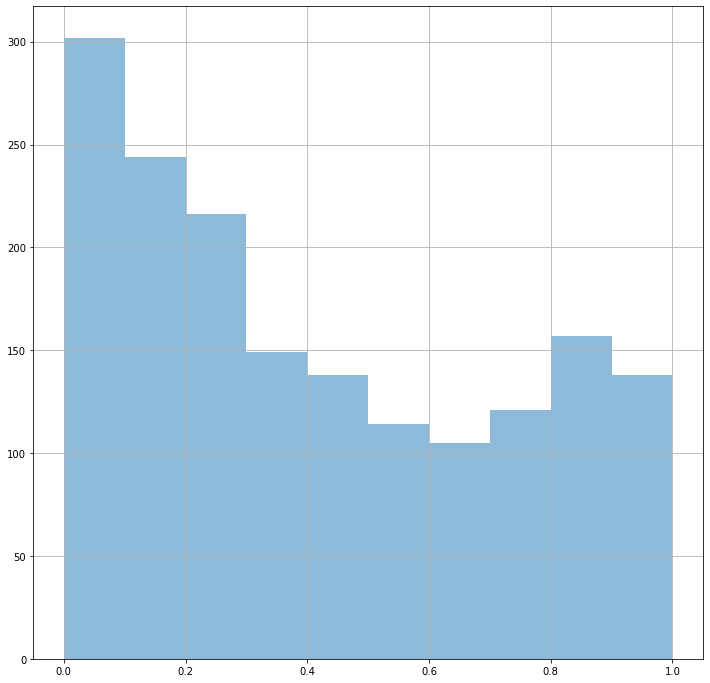

In [12]:
(df["num_bikes_available"]/df['capacity']).hist(alpha=0.5)

<AxesSubplot:xlabel='capacity', ylabel='num_bikes_available'>

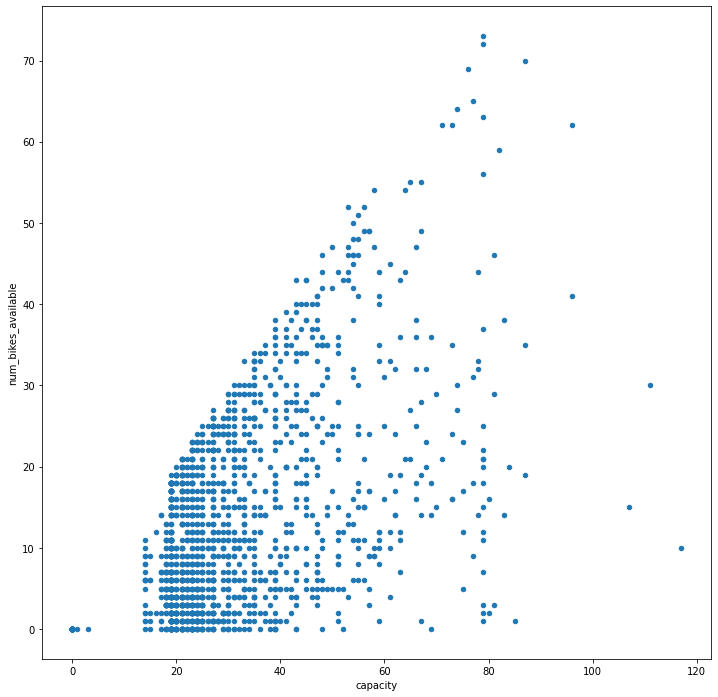

In [13]:
df.plot(kind='scatter', x="capacity", y="num_bikes_available")

In [19]:
df = df[df['lat']>0]

<AxesSubplot:xlabel='lon', ylabel='lat'>

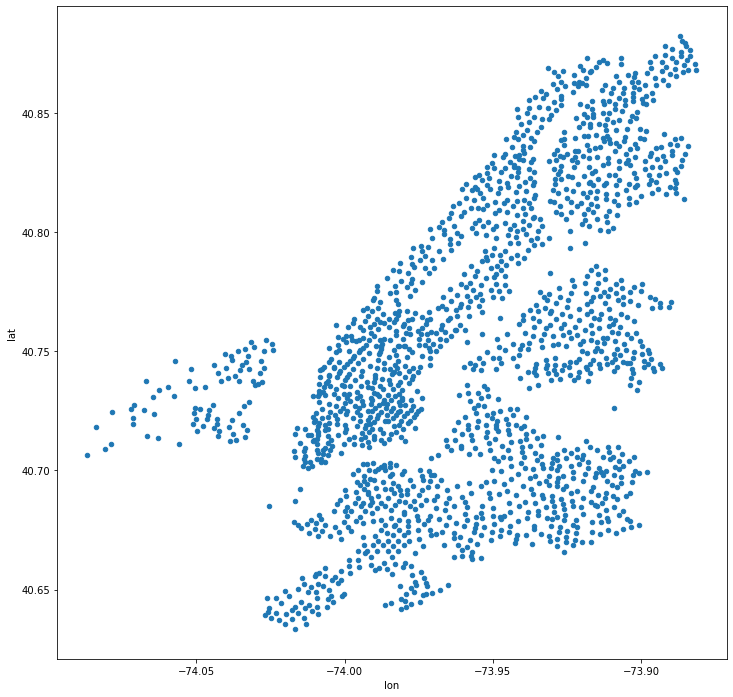

In [20]:
# Let's do a first plot. Put the stations on a scatterplot based on
# their longitude and latitude
df.plot(kind='scatter', x='lon', y='lat')

<AxesSubplot:xlabel='lon', ylabel='lat'>

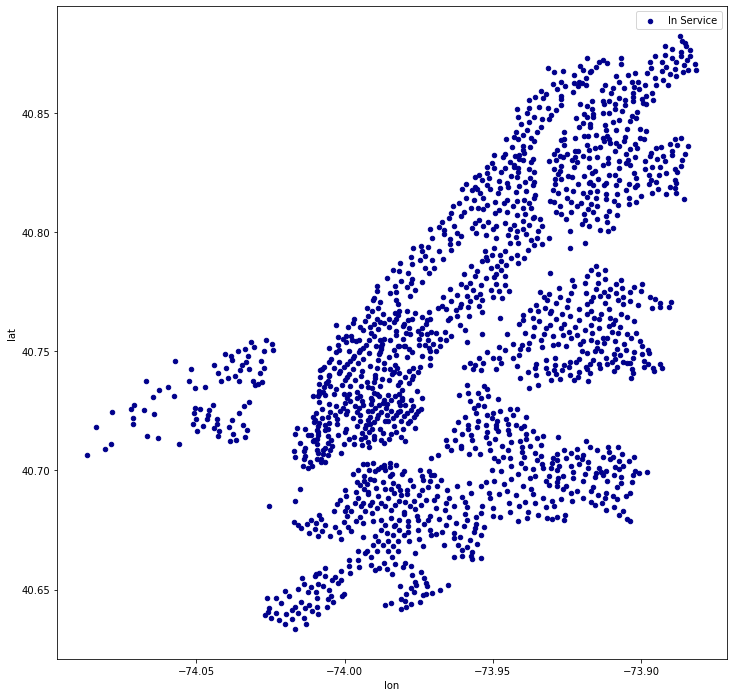

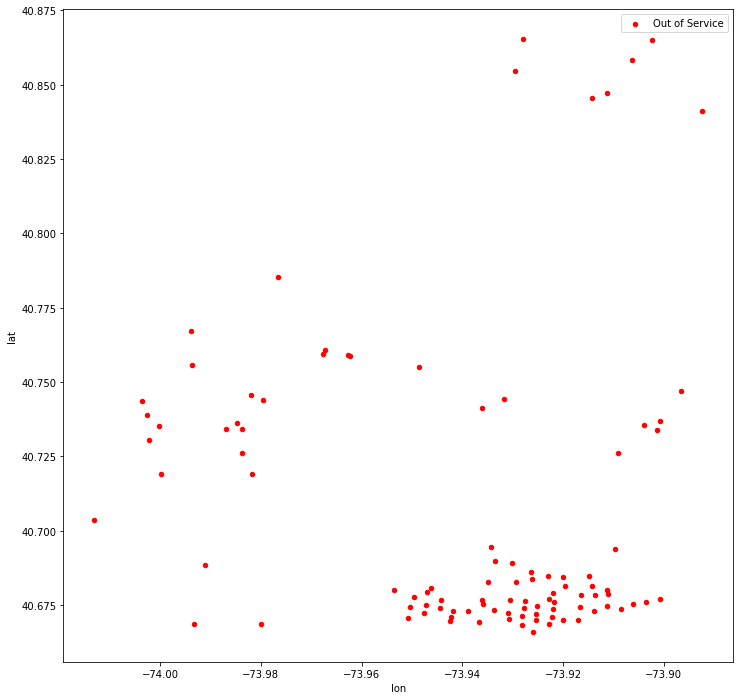

In [21]:
# Lets plot the stations that are out of service in red
inservice = (df["station_status"] == 'active')
outofservice = (df["station_status"] == 'out_of_service')

df[inservice].plot(kind='scatter', 
                   x='lon', 
                   y='lat', 
                   color='DarkBlue', 
                   label='In Service')

df[outofservice].plot(kind='scatter', 
                      x='lon', 
                      y='lat', 
                      color='Red', 
                      label = 'Out of Service')

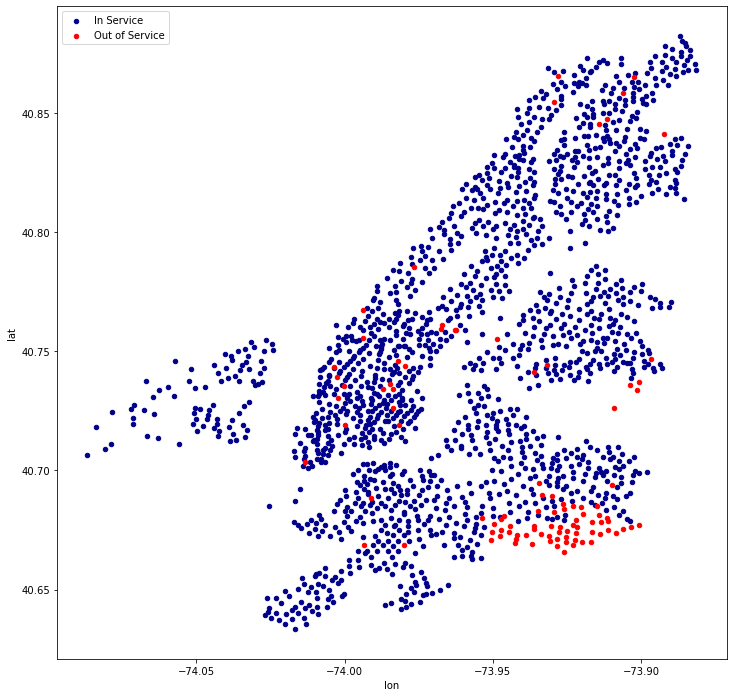

In [22]:
# I do not like having to separate plots for that. There should be a way to merge the two plots
# After checking the online documentation, it seem that we will use the "ax" convention
inservice = (df["station_status"] == 'active')
outofservice = (df["station_status"] == 'out_of_service')

firstplot = df[inservice].plot(kind='scatter', 
                               x='lon', 
                               y='lat', 
                               color='DarkBlue', 
                               label='In Service')

secondplot = df[outofservice].plot(kind='scatter', 
                      x='lon', 
                      y='lat', 
                      color='Red', 
                      label = 'Out of Service', 
                      ax = firstplot)


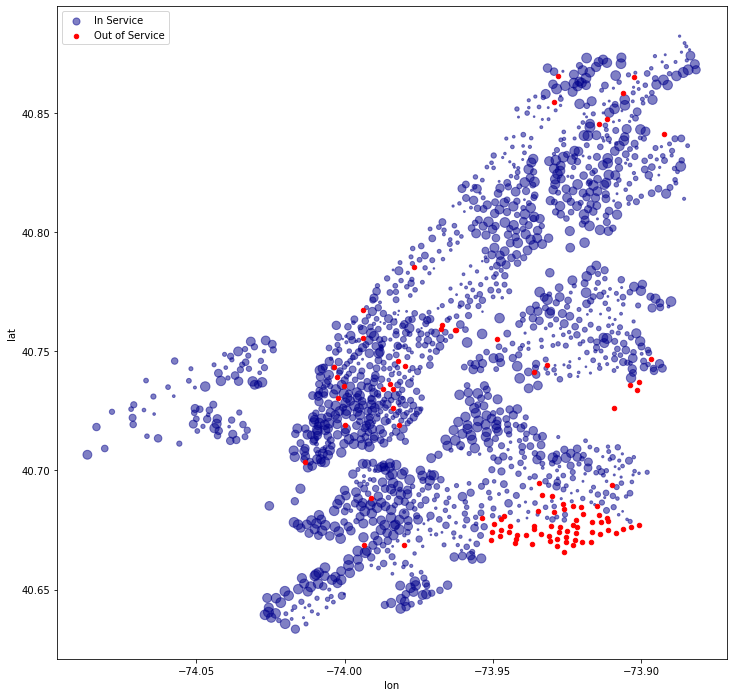

In [23]:
# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = (df["station_status"] == 'active')
outofservice = (df["station_status"] == 'out_of_service')

# We also add the "alpha=0.5" to add transparency
firstplot = df[inservice].plot(kind='scatter', 
                               x='lon', 
                               y='lat', 
                               color='DarkBlue', 
                               alpha=0.5, 
                               label='In Service', 
                               s=100*(df[inservice]['num_bikes_available']/df[inservice]['capacity']))

secondplot = df[outofservice].plot(kind='scatter', 
                                   x='lon', 
                                   y='lat', 
                                   color='Red', 
                                   ax = firstplot, 
                                   label = 'Out of Service')

### Exercise

- plot the empty stations on the map
- plot the full stations on the map 

In [ ]:
# your code goes here
